In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [7]:
training = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

training['train_test']=1
test['train_test']=0
test['Survived']= np.NaN
all_data = pd.concat([training,test])

all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [8]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [12]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

In [11]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [13]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


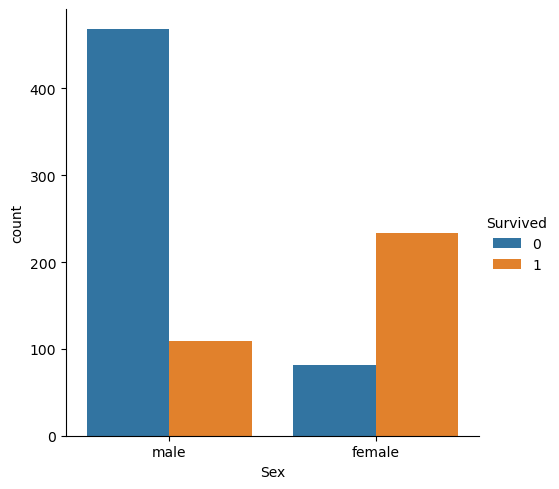

In [14]:
# Countplot
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = training)


In [16]:
df_num = training[['Age', 'SibSp', 'Parch', 'Fare' ]]
df_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]


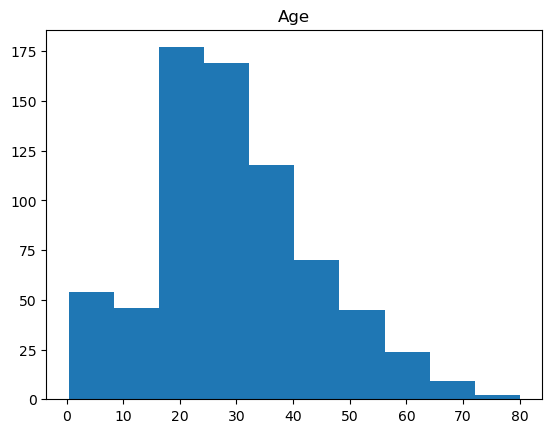

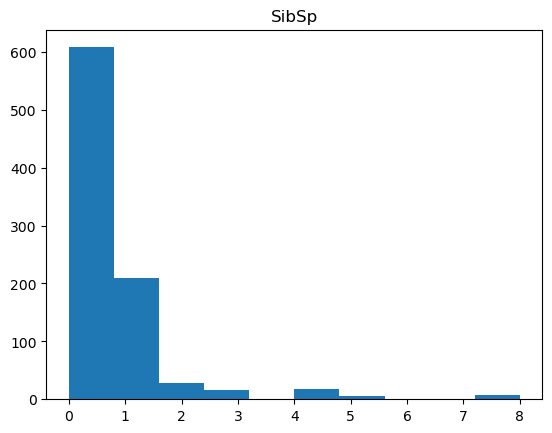

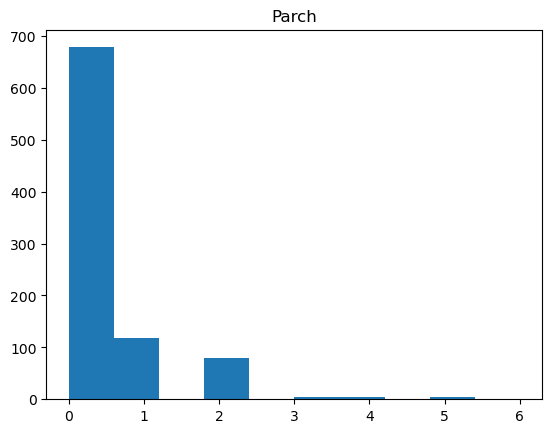

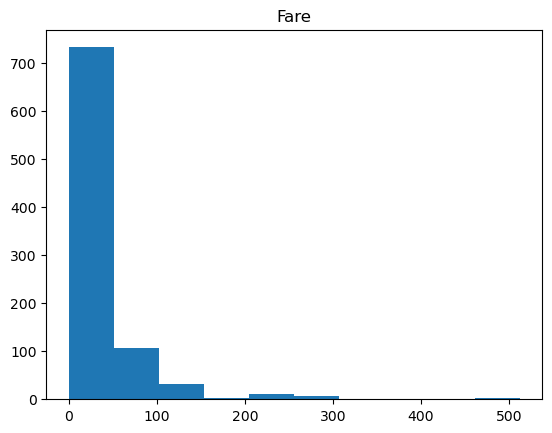

In [18]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

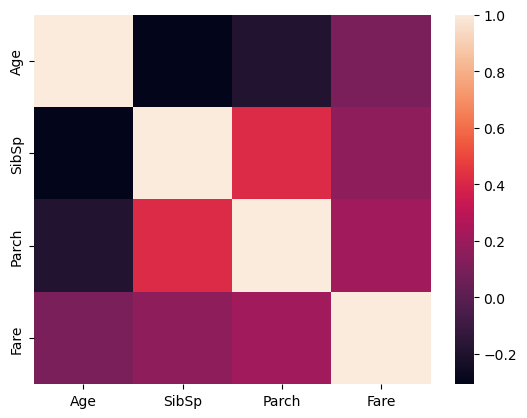

In [19]:
sns.heatmap(df_num.corr())

<AxesSubplot:xlabel='Sex', ylabel='Age'>

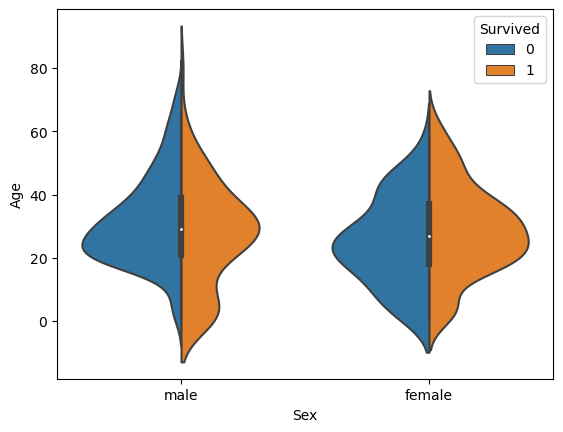

In [20]:
sns.violinplot(x= 'Sex', y= 'Age', hue= 'Survived', data = training, split= 'True')

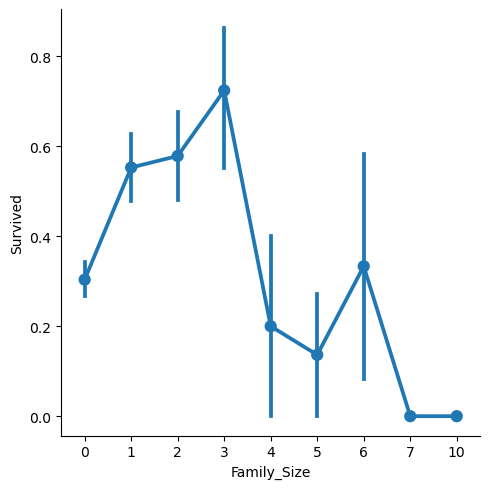

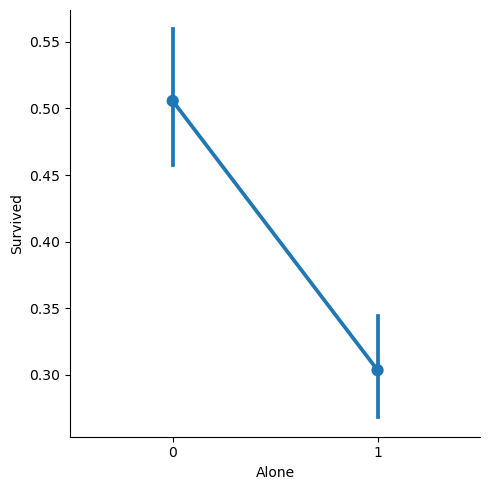

In [21]:
# Adding a column Family_Size and Alone

training['Family_Size'] = 0
training['Family_Size'] = training['Parch']+training['SibSp']
training['Alone'] = 0
training.loc[training.Family_Size == 0, 'Alone'] = 1

sns.factorplot(x = 'Family_Size', y = 'Survived', data = training)
sns.factorplot(x = 'Alone', y = 'Survived', data = training)

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

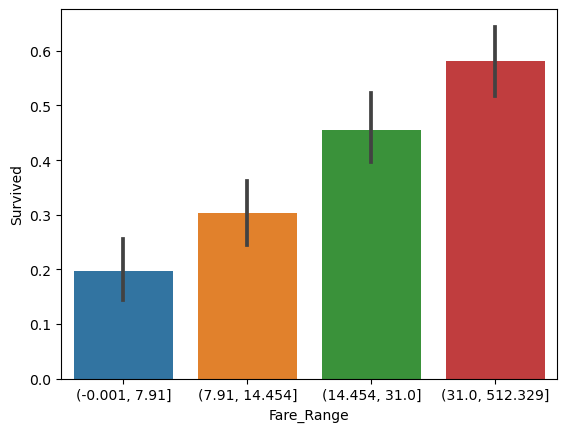

In [22]:
# Dividing Fare into 4bins

training['Fare_Range'] = pd.qcut(training['Fare'], 4)

sns.barplot(x = 'Fare_Range', y = 'Survived', data = training)

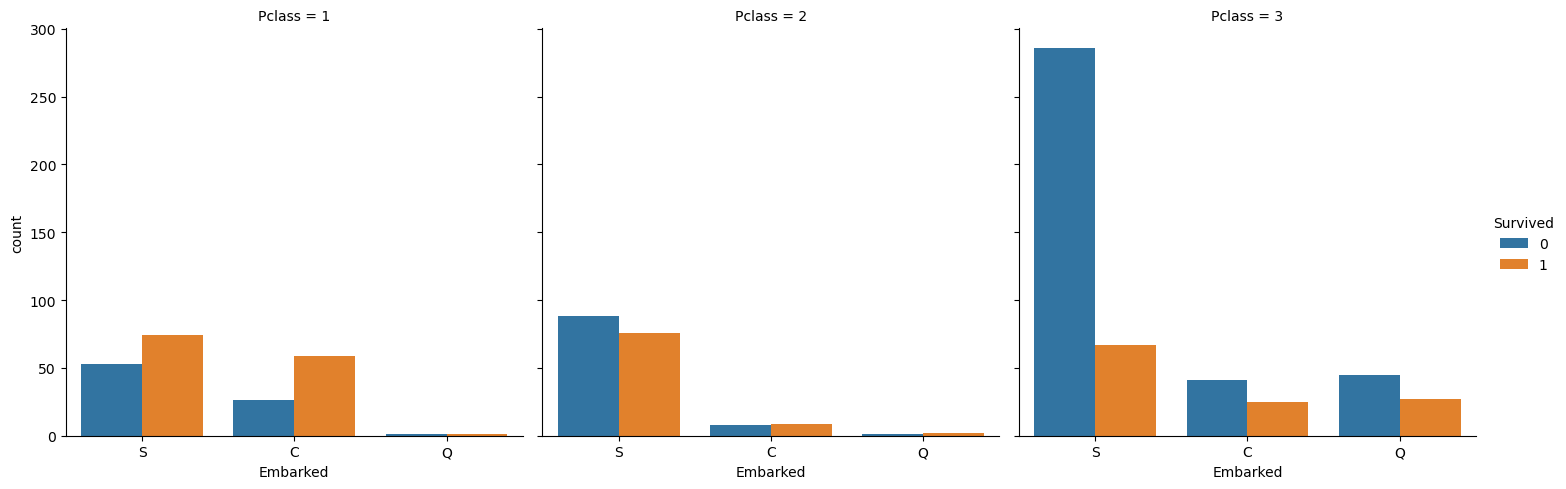

In [23]:
# Countplot
sns.catplot(x ='Embarked', hue = 'Survived', kind = 'count', col = 'Pclass', data = training)

In [25]:
pd.pivot_table(training, index= 'Survived', values= ['Age', 'SibSp', 'Parch', 'Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


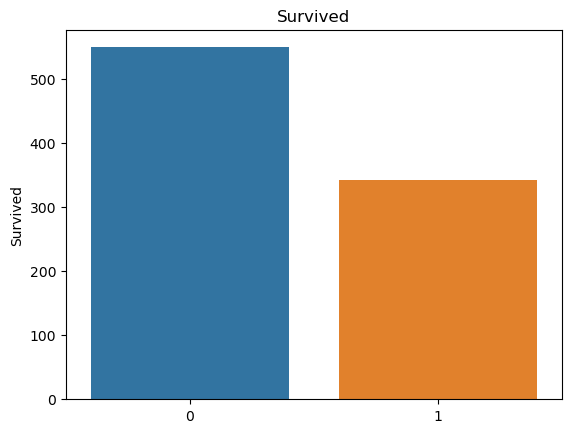

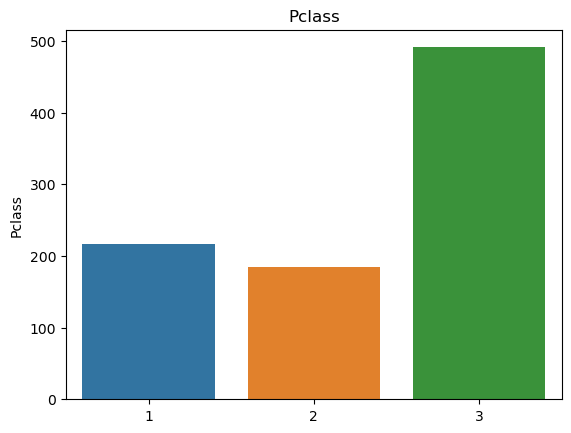

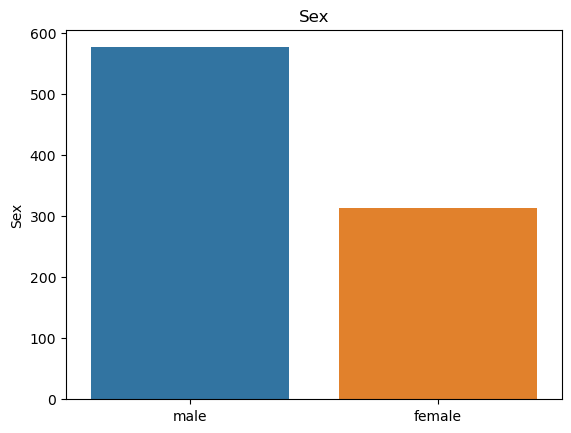

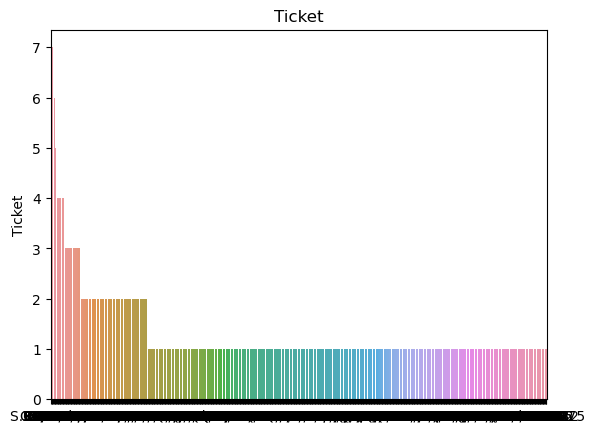

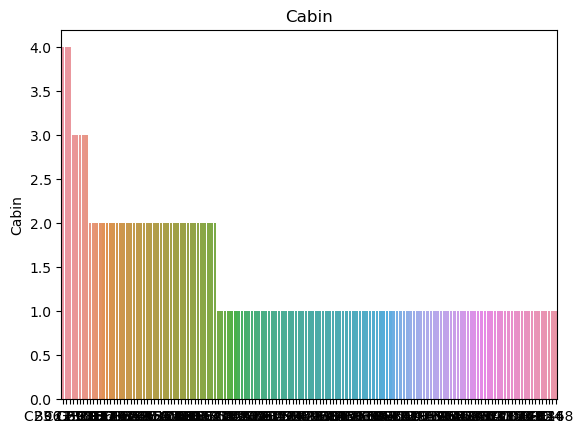

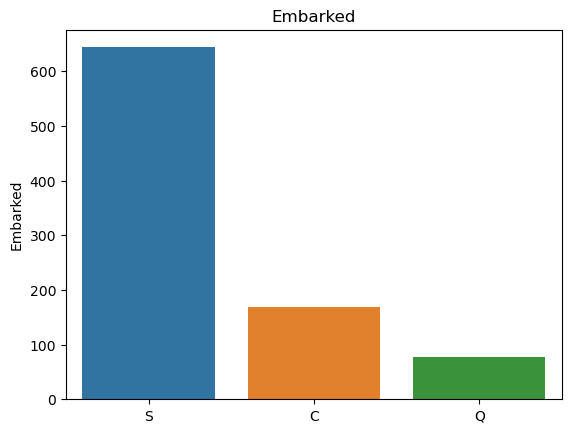

In [26]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [27]:
print (pd.pivot_table(training, index= 'Survived', columns= 'Pclass', values= 'Ticket', aggfunc= 'count'))
print()

print(pd.pivot_table(training, index= 'Survived', columns= 'Sex', values= 'Ticket', aggfunc= 'count'))
print()

print(pd.pivot_table(training, index= 'Survived', columns= 'Embarked', values= 'Ticket', aggfunc= 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [28]:
df_cat.Cabin
training['cabin_multiple']= training.Cabin.apply(lambda x:0 if pd.isna(x)
                                                else  len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [29]:
pd.pivot_table(training, index= 'Survived', columns= 'cabin_multiple', values= 'Ticket', aggfunc= 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [30]:
# n stands for null

training['cabin_adv']= training.Cabin.apply(lambda x: str(x)[0])
print (training.cabin_adv.value_counts())
pd.pivot_table(training, index= 'Survived', columns= 'cabin_adv', values= 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [37]:
x = training.drop('Embarked', axis=1)
y = training['Embarked']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)


In [39]:
sc = StandardScaler()

In [40]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

ValueError: could not convert string to float: 'Partner, Mr. Austen'

In [41]:
# Logistic Regression

lr= LogisticRegression(max_iter= 2000)
cv= cross_val_score(lr, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

TypeError: '<' not supported between instances of 'float' and 'str'